In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('heartdisease.csv',names=range(0,14), header=0,na_values='?')
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1
195,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0
196,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2
197,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0


In [4]:
df.isnull()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,False,False,False,False,False,False,False,False,False,False,True,True,True,False
1,False,False,False,False,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,False,True,True,False
3,False,False,False,False,False,False,False,False,False,False,False,True,True,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,False,False,False,False,False,False,False,False,False,False,True,True,True,False
195,False,False,False,True,False,False,False,True,True,True,True,True,True,False
196,False,False,False,False,False,False,False,False,False,False,True,True,False,False
197,False,False,False,True,False,False,False,True,True,True,True,True,True,False


In [5]:
df.isnull().sum()

0       0
1       0
2       0
3      56
4       7
5       7
6       0
7      53
8      53
9      56
10    102
11    197
12    165
13      0
dtype: int64

In [6]:
df.dtypes

0       int64
1       int64
2       int64
3     float64
4     float64
5     float64
6       int64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
13      int64
dtype: object

As we can see that in some columns there are lots of NaN values present so it is better to remove those columns as they can put a bad impact on our results

In [7]:
df=df.drop([11,12],axis=1)
df

,0,1,2,3,4,5,6,7,8,9,10,13
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
194,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,1
195,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,0
196,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,2
197,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,0


In [8]:
df.isnull().sum()

0       0
1       0
2       0
3      56
4       7
5       7
6       0
7      53
8      53
9      56
10    102
13      0
dtype: int64

Now We can use IMPUTER Function to remove all the null Values

In [9]:
from sklearn.impute import SimpleImputer

In [10]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df[3]=imp.fit_transform(df[3].values.reshape(-1,1))
df[4]=imp.fit_transform(df[4].values.reshape(-1,1))
df[5]=imp.fit_transform(df[5].values.reshape(-1,1))
df[7]=imp.fit_transform(df[7].values.reshape(-1,1))
df[8]=imp.fit_transform(df[8].values.reshape(-1,1))
df[9]=imp.fit_transform(df[9].values.reshape(-1,1))
df[10]=imp.fit_transform(df[10].values.reshape(-1,1))

In [11]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
13    0
dtype: int64

Here we can see that now there is no nul value present in the dataset

In [12]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,13
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,2.134021,0
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.000000,2
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.000000,1
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.000000,0
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.000000,0


In [13]:
df.corr()

,0,1,2,3,4,5,6,7,8,9,10,13
0,1.000000,0.033837,-0.039809,0.180915,0.065347,0.126706,0.001487,-0.148786,0.133318,0.154215,0.100705,0.286630
1,0.033837,1.000000,0.037525,0.012238,-0.096953,-0.054735,0.060305,-0.001016,0.015703,0.096219,0.088371,0.147190
2,-0.039809,0.037525,1.000000,0.073888,0.063650,-0.045135,0.033617,-0.122405,0.180299,0.036454,0.029214,0.167202
3,0.180915,0.012238,0.073888,1.000000,0.149121,0.186111,0.091401,-0.012047,0.219314,0.113345,0.092285,0.141186
4,0.065347,-0.096953,0.063650,0.149121,1.000000,0.154537,0.022824,-0.039052,0.084179,-0.005121,0.059860,0.075094
5,0.126706,-0.054735,-0.045135,0.186111,0.154537,1.000000,0.167662,0.049509,-0.210867,-0.093830,0.015394,0.052104
6,0.001487,0.060305,0.033617,0.091401,0.022824,0.167662,1.000000,0.013548,-0.082538,-0.111718,-0.018541,-0.033597
7,-0.148786,-0.001016,-0.122405,-0.012047,-0.039052,0.049509,0.013548,1.000000,-0.072758,0.178435,-0.123312,-0.078186
8,0.133318,0.015703,0.180299,0.219314,0.084179,-0.210867,-0.082538,-0.072758,1.000000,0.304988,0.110798,0.254020
9,0.154215,0.096219,0.036454,0.113345,-0.005121,-0.093830,-0.111718,0.178435,0.304988,1.000000,0.230157,0.378550


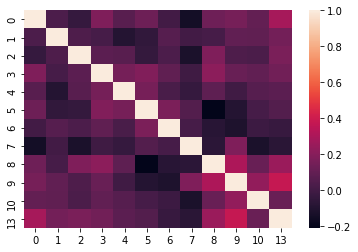

In [14]:
sns.heatmap(df.corr())

In [15]:
# We can see that most of the boxes are dark colored so they are not highly corelated.

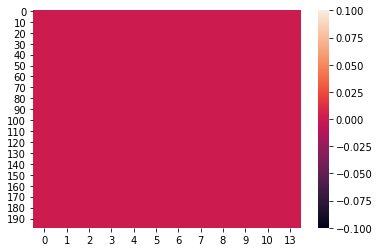

In [16]:
sns.heatmap(df.isnull())

In [17]:
# same color data shows no null value present in the dataset now

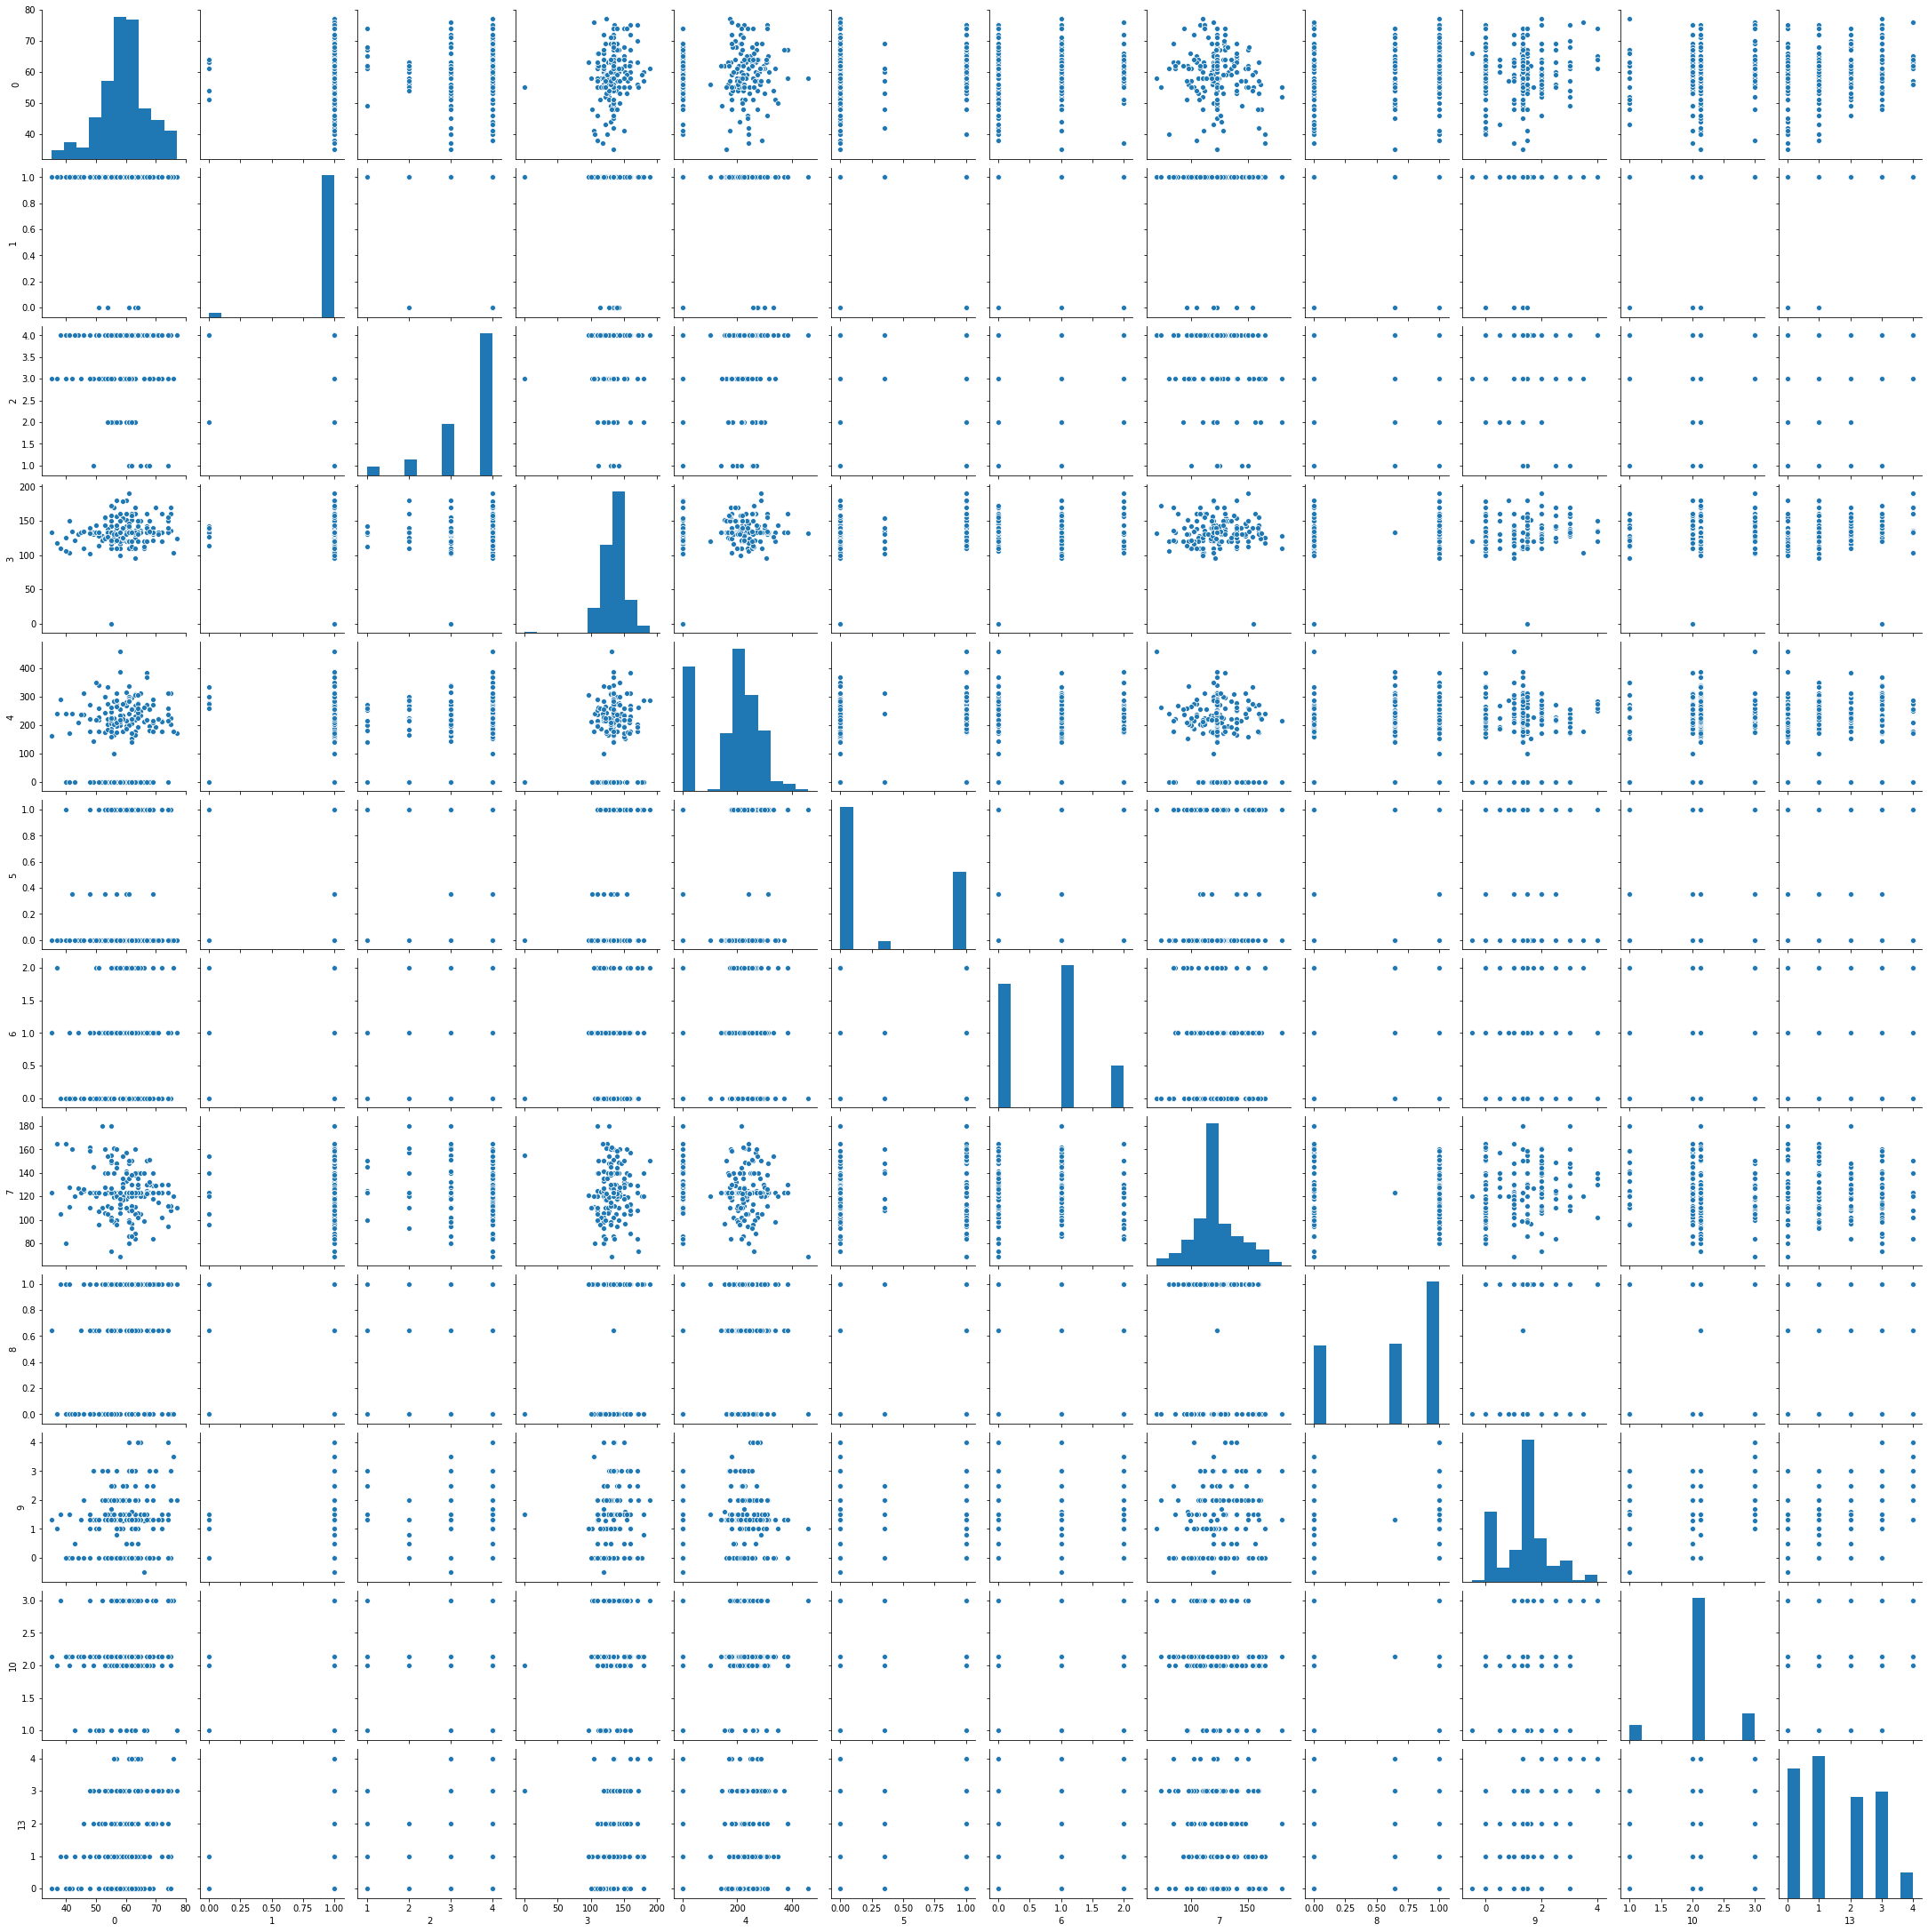

In [18]:
sns.pairplot(df)

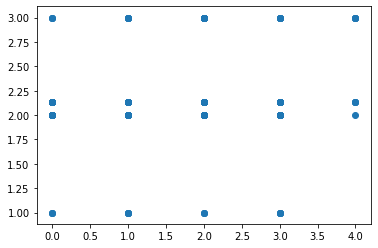

In [19]:
plt.scatter(df[13],df[10])

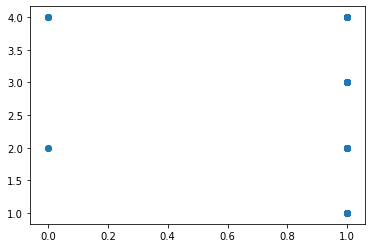

In [20]:
plt.scatter(df[1],df[2])

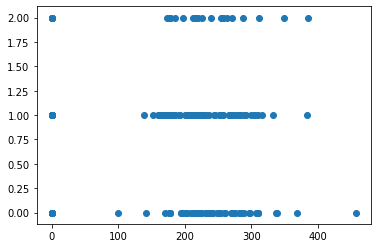

In [21]:
plt.scatter(df[4],df[6])

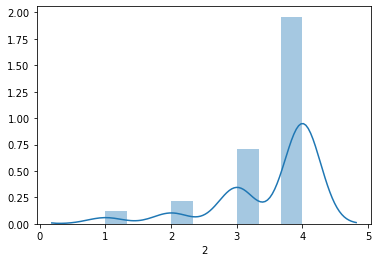

In [22]:
sns.distplot(df[2])

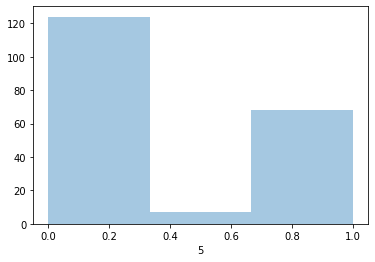

In [23]:
sns.distplot(df[5],kde=False)

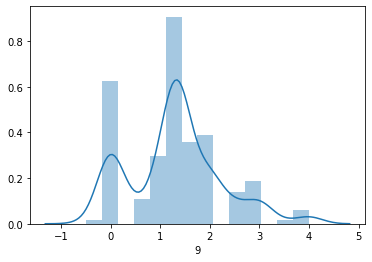

In [24]:
sns.distplot(df[9])

In [25]:
#Now, to check the outliers visually ets check the box plots

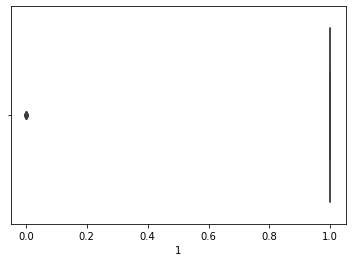

In [26]:
sns.boxplot(df[1])

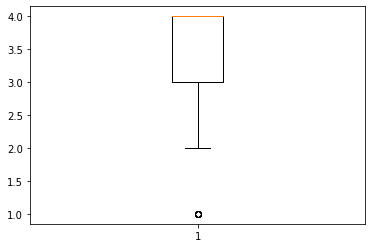

In [27]:
plt.boxplot(df[2])
plt.show()

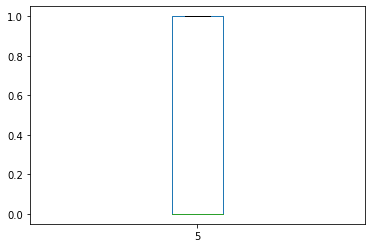

In [28]:
df[5].plot.box()

In [29]:
# we can see that there are so manu out liers present

In [30]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,13
count,199.000000,199.000000,199.000000,199.00000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,59.331658,0.969849,3.502513,133.72028,178.322917,0.354167,0.733668,122.869863,0.643836,1.309091,2.134021,1.517588
std,7.827080,0.171433,0.796928,18.29815,112.144792,0.470958,0.684918,18.867497,0.411203,0.932462,0.467411,1.222038
min,35.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.000000
25%,55.000000,1.000000,3.000000,125.50000,119.500000,0.000000,0.000000,112.000000,0.000000,1.000000,2.000000,0.000000
50%,60.000000,1.000000,4.000000,133.72028,214.000000,0.000000,1.000000,122.869863,0.643836,1.309091,2.134021,1.000000
75%,64.000000,1.000000,4.000000,140.00000,254.000000,1.000000,1.000000,130.000000,1.000000,2.000000,2.134021,3.000000
max,77.000000,1.000000,4.000000,190.00000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,4.000000


In [31]:
from scipy.stats import zscore

In [32]:
z=np.abs(zscore(df))
z

array([[1.96373685e+00, 1.76318130e-01, 6.25830650e-01, ...,
        1.40744850e+00, 9.52499786e-16, 1.24498245e+00],
       [8.56037368e-02, 1.76318130e-01, 6.25830650e-01, ...,
        2.05252906e-01, 1.85738621e+00, 3.95756011e-01],
       [5.54815197e-01, 1.76318130e-01, 6.25830650e-01, ...,
        1.28038717e+00, 2.43229147e+00, 4.24613220e-01],
       ...,
       [5.54815197e-01, 1.76318130e-01, 6.25830650e-01, ...,
        1.40744850e+00, 9.52499786e-16, 3.95756011e-01],
       [1.70563837e-01, 1.76318130e-01, 6.25830650e-01, ...,
        0.00000000e+00, 9.52499786e-16, 1.24498245e+00],
       [3.41771310e-01, 1.76318130e-01, 1.89013499e+00, ...,
        1.40744850e+00, 9.52499786e-16, 4.24613220e-01]])

In [33]:
np.where(z>3)

(array([ 23,  32,  50,  65,  69,  71,  75,  78,  95,  96, 125, 127, 130,
        132, 136, 175, 189, 194, 195], dtype=int64),
 array([7, 3, 1, 2, 7, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2],
       dtype=int64))

In [34]:
z[23][7]

3.0356025400770243

In [35]:
df_1=df[(z<3).all(axis=1)]
df_1

,0,1,2,3,4,5,6,7,8,9,10,13
0,44,1,4,130.00000,209.0,0.0,1,127.000000,0.000000,0.000000,2.134021,0
1,60,1,4,132.00000,218.0,0.0,1,140.000000,1.000000,1.500000,3.000000,2
2,55,1,4,142.00000,228.0,0.0,1,149.000000,1.000000,2.500000,1.000000,1
3,66,1,3,110.00000,213.0,1.0,2,99.000000,1.000000,1.300000,2.000000,0
4,66,1,3,120.00000,0.0,0.0,1,120.000000,0.000000,-0.500000,1.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...
192,62,1,4,158.00000,170.0,0.0,1,138.000000,1.000000,0.000000,2.134021,1
193,46,1,4,134.00000,310.0,0.0,0,126.000000,0.000000,0.000000,2.134021,2
196,55,1,4,122.00000,223.0,1.0,1,100.000000,0.000000,0.000000,2.134021,2
197,58,1,4,133.72028,385.0,1.0,2,122.869863,0.643836,1.309091,2.134021,0


In [36]:
# Here we can see that around 19 rows are deleted as OUt Liers

We can apply here Classification 

In [37]:
x=df_1.iloc[:,0:11]
x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,2.134021
1,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.000000
2,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.000000
3,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.000000
4,66,1,3,120.0,0.0,0.0,1,120.0,0.0,-0.5,1.000000


In [38]:
y=df_1.iloc[:,-1]

In [39]:
y

0      0
1      2
2      1
3      0
4      0
      ..
192    1
193    2
196    2
197    0
198    1
Name: 13, Length: 180, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [41]:
max_acc_score=0
for r_state in range(40,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=r_state)
    logr=LogisticRegression()
    logr.fit(x_train,y_train)
    predlogr=logr.predict(x_test)
    accscore=accuracy_score(y_test,predlogr)
    if(accscore>max_acc_score):
        max_acc_score=accscore
        final_r_state=r_state
print('')
print('The max accuracy score corresponing to the',final_r_state,'is',max_acc_score)


The max accuracy score corresponing to the 175 is 0.4722222222222222


In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=175)

In [43]:
logr.fit(x_train,y_train)
logr.score(x_train,y_train)

0.3888888888888889

In [44]:
predlogr=logr.predict(x_test)

In [45]:
print('Accuracy Score=',accuracy_score(y_test,predlogr))
print(confusion_matrix(y_test,predlogr))
print(classification_report(y_test,predlogr))

Accuracy Score= 0.4722222222222222
[[ 1  9  0  1  0]
 [ 1 11  0  0  0]
 [ 0  4  1  2  0]
 [ 0  1  0  4  0]
 [ 1  0  0  0  0]]
              precision    recall  f1-score   support

           0       0.33      0.09      0.14        11
           1       0.44      0.92      0.59        12
           2       1.00      0.14      0.25         7
           3       0.57      0.80      0.67         5
           4       0.00      0.00      0.00         1

    accuracy                           0.47        36
   macro avg       0.47      0.39      0.33        36
weighted avg       0.52      0.47      0.38        36



TO CHECK ALL THE MODELS IN ONE GO

In [46]:
model=[SVC(),DecisionTreeClassifier(),KNeighborsClassifier()]
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy-Score of',m, 'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy-Score of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) is
0.3055555555555556
[[ 0 10  0  1  0]
 [ 0 11  0  1  0]
 [ 0  6  0  1  0]
 [ 0  5  0  0  0]
 [ 0  1  0  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.33      0.92      0.49        12
           2       0.00      0.00      0.00         7
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         1

    accuracy                           0.31        36
   macro avg       0.07      0.18      0.10        36
weighted avg       0.11      0.31      0.16        36



Accuracy-Score of DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=No

# Lets try to improve the score by using Ensemble techniques

In [47]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [48]:
rf=RandomForestClassifier(n_estimators=100,random_state=175)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
predrf=rf.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy Score 0.3333333333333333
[[1 8 2 0 0]
 [1 8 1 2 0]
 [1 3 1 2 0]
 [0 3 0 2 0]
 [0 1 0 0 0]]
              precision    recall  f1-score   support

           0       0.33      0.09      0.14        11
           1       0.35      0.67      0.46        12
           2       0.25      0.14      0.18         7
           3       0.33      0.40      0.36         5
           4       0.00      0.00      0.00         1

    accuracy                           0.33        36
   macro avg       0.25      0.26      0.23        36
weighted avg       0.31      0.33      0.28        36



In [49]:
ad=AdaBoostClassifier(random_state=175)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

Accuracy Score 0.25
[[2 5 2 2 0]
 [3 5 2 1 1]
 [0 5 0 2 0]
 [0 2 1 2 0]
 [0 0 0 1 0]]
              precision    recall  f1-score   support

           0       0.40      0.18      0.25        11
           1       0.29      0.42      0.34        12
           2       0.00      0.00      0.00         7
           3       0.25      0.40      0.31         5
           4       0.00      0.00      0.00         1

    accuracy                           0.25        36
   macro avg       0.19      0.20      0.18        36
weighted avg       0.25      0.25      0.23        36



In [50]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print('Accuracy Score',accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

Accuracy Score 0.3055555555555556
[[2 6 0 3 0]
 [2 6 3 1 0]
 [1 3 0 2 1]
 [0 1 0 3 1]
 [0 1 0 0 0]]
              precision    recall  f1-score   support

           0       0.40      0.18      0.25        11
           1       0.35      0.50      0.41        12
           2       0.00      0.00      0.00         7
           3       0.33      0.60      0.43         5
           4       0.00      0.00      0.00         1

    accuracy                           0.31        36
   macro avg       0.22      0.26      0.22        36
weighted avg       0.29      0.31      0.27        36



# CROSS VALIDATION TECHNIQUE

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
svc=SVC()
svcscores=cross_val_score(svc,x,y,cv=5)
print(svcscores)
print(svcscores.mean(),svcscores.std())

[0.27777778 0.30555556 0.27777778 0.27777778 0.30555556]
0.28888888888888886 0.013608276348795441


In [53]:
dtc=DecisionTreeClassifier()
dtcscores=cross_val_score(dtc,x,y,cv=5)
print(dtcscores)
print(dtcscores.mean(),dtcscores.std())

[0.27777778 0.25       0.30555556 0.30555556 0.30555556]
0.28888888888888886 0.022222222222222233


In [54]:
knn=KNeighborsClassifier()
knnscores=cross_val_score(knn,x,y,cv=5)
print(knnscores)
print(knnscores.mean(),knnscores.std())

[0.30555556 0.22222222 0.25       0.30555556 0.36111111]
0.2888888888888889 0.048432210483785265


# TO SAVE THE BEST MODEL THOUGH JOBLIB

In [55]:
from sklearn.externals import joblib

In [56]:
joblib.dump(logr,'logrfile.obj')

['logrfile.obj']

In [ ]:
As Logistic Regression gives the best Accuracy score this